The sum of the area is: 7.545454545454545


7.545454545454545

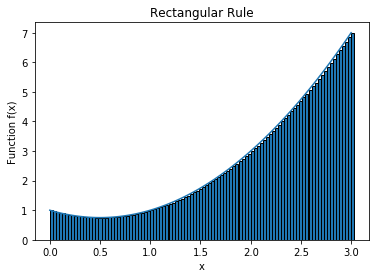

In [96]:
import numpy as np 
import matplotlib.pyplot as plt

def rectangle(f,a,b,N):     #f= function, a= start point, b= end point, N= parts
    x=np.linspace(a,b,N)    #generate x values from points a to b
    y= f(x)                 #pass all generated x values through the function f
    w= (b-a)/N              #width of each interval
    area= np.sum(y)*w       #multiply all the areas of each interval by the width to get total area
    
    plt.plot(x,y)
    plt.bar(x+w/2,y,w, edgecolor="black")
    plt.title("Rectangular Rule")
    plt.xlabel('x')
    plt.ylabel('Function f(x)')
    
    plt.show
    print ("The sum of the area is:", area)
    
    return area

rectangle(lambda x: x**2-x+1, 0,3,100)

The sum of the area is: 47.837181734702405


47.837181734702405

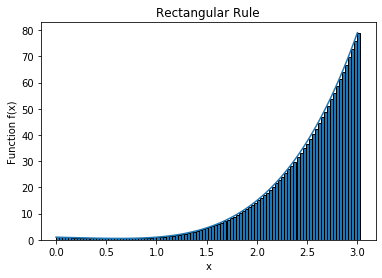

In [101]:
rectangle (lambda x: x**4-x+1, 0,3,100)

The sum of the area is: 0.8923470698543654


0.8923470698543654

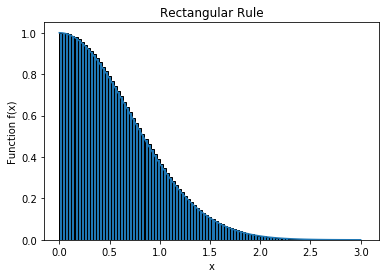

In [98]:
rectangle (lambda x: np.exp(-x**2), 0,3,100)

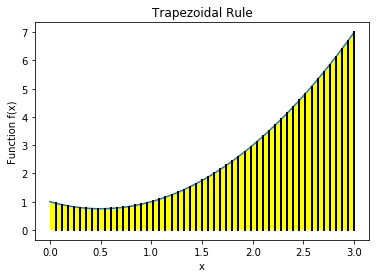

The sum of the area is: 7.501799999999999


7.501799999999999

In [110]:
import numpy as np

def trapezoid(f,a,b,N):
    x = np.linspace(a, b, N+1) #generate all x values between points a and b, with N+1 intervals
    area = f(a)+f(b)           #initial area is points a and b passing through the function f
    
    w=(b-a)/N                  #width of each interval
    
    for i in range(1,N): 
        area+= 2*(f(x[i]))     #calculate the area of each interval between points a and b
                   
    total_area= area*w/2       #multiply summation of area by the width divided by 2
    
    y= f(x)
    plt.plot(x,y)
    
    y2 = np.array([0,0])
    for i in range(N):
        x0 = x[i:i+2]
        y1 = y[i:i+2]
        plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='yellow')
        linex, liney = [x[i+1], x[i+1]], [0, y[i+1]]
        plt.plot(linex, liney, color='black', linewidth=2.0)
        plt.title("Trapezoidal Rule")
        plt.xlabel('x')
        plt.ylabel('Function f(x)')

    
    plt.show()
    print ("The sum of the area is:", total_area)
    
    return total_area
    
trapezoid(lambda x: x**2-x+1, 0,3,50)

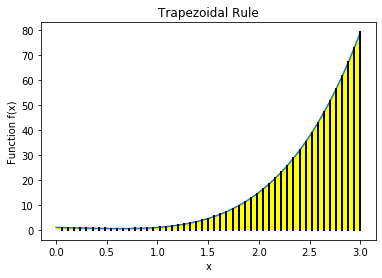

The sum of the area is: 47.132398703999996


47.132398703999996

In [111]:
trapezoid(lambda x: x**4-x+1, 0,3,50)

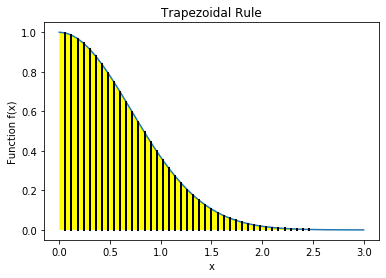

The sum of the area is: 0.8862071265209955


0.8862071265209955

In [112]:
trapezoid(lambda x: np.exp(-x**2), 0,3,50)

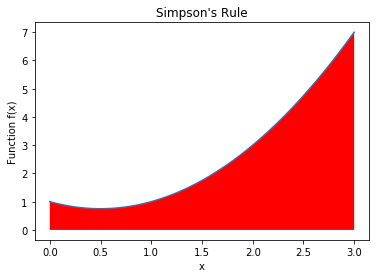

The sum of the area is: 7.509999999999998


7.509999999999998

In [113]:
import numpy as np
import matplotlib.pyplot as plt

def Simpsons(f,a,b,N):
    w= (b-a)/N             #width
    area= f(a)+f(b)        #calculate points a and b passing through function f
    
    for i in range(1,N,2): #for odd x,multiply by 4
        area += 4*f(a+i*w)
    for i in range(0,N,2): #for even x, multiply by 3
        area += 2*f(a+i*w)
    
    x=np.linspace(a,b,N)
    y=f(x)
    plt.plot(x,y)
    plt.title("Simpson's Rule")
    plt.xlabel('x')
    plt.ylabel('Function f(x)')
    plt.fill_between(x, y,  facecolor="red")
    
    plt.show()
    print ("The sum of the area is:", area*w/3)
    
    
    return area*w/3        #multiply summated area by width divided by 3

Simpsons(lambda x: x**2-x+1, 0,3,200)

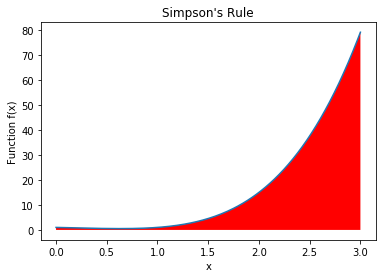

The sum of the area is: 47.11000002024996


47.11000002024996

In [114]:
Simpsons(lambda x: x**4-x+1, 0,3,200)

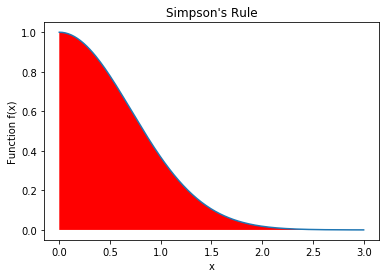

The sum of the area is: 0.8962073482532772


0.8962073482532772

In [115]:
Simpsons(lambda x: np.exp(-x**2), 0,3,200)

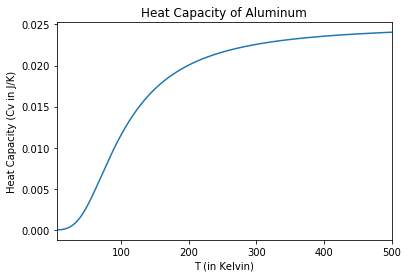

In [109]:
import numpy as np
import matplotlib.pyplot as plt

V= .001        #volume in cubic meters
Kb= 1.3806e-28 #Boltzmann constant in (m**2 * kg)/(s**2 * K)
rho= 6.022e28  #density in cubic meters
ThD= 428       #Debye temperature in K

def cV1(T):    #define first part of equation (part without integral)
    return 9*V*Kb*rho*((T/ThD)**3) 

def f(x):     #define function inside the integral
    if x==0:
        return 0
    return (x**4 * np.exp(x))/(np.exp(x)-1)**2

def integrate(T):    #use Simpsons rule to calculate the integral part of the heat capacity equation
    a=0              #start point
    b= ThD/T         #end point
    N=1000           #parts between the points
    
    w= (b-a)/N
    area= f(a)+f(b)
    
    for i in range(1,N,2):
        area += 4*(f(a+i*w))
    for i in range(0,N,2):
        area += 2*(f(a+i*w))
    
    return area*w/3

T= np.linspace(5,500,495) #generate x values (temperature) between 5 and 500 K
cv= list()                #create list of y values

for i in T:
    cv2= cV1(i)*integrate(i) #multiply first part of equation by the integral part 
    cv.append(cv2)           #add the given heat capacity for the given temp to the Y value list
    
plt.plot(T,cv)
plt.title("Heat Capacity of Aluminum")
plt.xlabel('T (in Kelvin)')
plt.ylabel('Heat Capacity (Cv in J/K)')
plt.xlim([5,500])

    

plt.show()

